In [5]:
import pandas as pd
import numpy as np
import zipfile
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../data/scores_analysis.csv').iloc[:,1:]
df

,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,favorite_sentiments,underdog_props,favorite_props,underdog_pos_prop,underdog_neg_prop,favorite_pos_prop,favorite_neg_prop,Score Differential,spread_clean,Favorite_Win
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,"[1, 1, 1, 1, 1, -1, 0, 0, 1, 1, 1, -1, -1, 0, ...","(0.3829787234042553, 0.3617021276595745)","(0.4375, 0.28125)",0.382979,0.361702,0.437500,0.281250,-15,8.0,L
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,"[0, -1, -1, -1, 1, -1, 0, 0, -1, 0, 1, -1, -1,...","(0.32954545454545453, 0.3068181818181818)","(0.3333333333333333, 0.24074074074074073)",0.329545,0.306818,0.333333,0.240741,9,7.0,W
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,"[1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 0, 1, -1,...","(0.40268456375838924, 0.3288590604026846)","(0.39, 0.37)",0.402685,0.328859,0.390000,0.370000,6,6.5,W
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,"[-1, 1, 0, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -...","(0.3561643835616438, 0.3059360730593607)","(0.3333333333333333, 0.41304347826086957)",0.356164,0.305936,0.333333,0.413043,-20,2.5,L
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,"[1, 0, 1, 1, -1, -1, -1, 1, -1, 0, -1, 1, 0, 1...","(0.5, 0.4)","(0.4028268551236749, 0.36042402826855124)",0.500000,0.400000,0.402827,0.360424,3,10.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2022,18,Sun,2023-01-08,4:25,@,Philadelphia Eagles,W 22-16,L -16,NaN,...,"[0, 0, 1, 1, 1, -1, -1, 1, 1, 0, 1, 0, 0, 0, -...","(0.39215686274509803, 0.38235294117647056)","(0.3805031446540881, 0.2893081761006289)",0.392157,0.382353,0.380503,0.289308,6,16.0,W
1563,2022,18,Sun,2023-01-08,4:25,@,San Francisco 49ers,W 38-13,W -14,NaN,...,"[1, -1, -1, -1, 1, -1, 1, 1, 0, 0, -1, -1, 0, ...","(0.6129032258064516, 0.12903225806451613)","(0.45901639344262296, 0.2098360655737705)",0.612903,0.129032,0.459016,0.209836,25,14.0,W
1564,2022,18,Sun,2023-01-08,4:25,@,Seattle Seahawks,W 19-16 (OT),L -6,NaN,...,"[-1, -1, -1, 0, 0, -1, 1, -1, -1, 0, 0, 0, 0, ...","(0.18181818181818182, 0.5681818181818182)","(0.3875968992248062, 0.37209302325581395)",0.181818,0.568182,0.387597,0.372093,3,6.0,W
1565,2022,18,Sun,2023-01-08,4:25,NaN,Dallas Cowboys,L 6-26,L -7,@,...,"[-1, -1, -1, 1, 0, 1, 1, 0, -1, 1, 0, 0, 1, -1...","(0.46153846153846156, 0.24615384615384617)","(0.3463035019455253, 0.3657587548638132)",0.461538,0.246154,0.346304,0.365759,-20,7.0,L


In [121]:
def make_graph(df, title='', filter_col = 'Score Differential'):
    scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1)

    mean_pos_dog_prop = []
    mean_neg_dog_prop = []
    mean_pos_fav_prop = []
    mean_neg_fav_prop = []
    num = []
    for i in scores:
        smoll_df = df[df[filter_col]==i]
        if len(smoll_df)==0:
            num.append(0)
            mean_neg_dog_prop.append(np.nan)
            mean_pos_dog_prop.append(np.nan)
            mean_pos_fav_prop.append(np.nan)
            mean_neg_fav_prop.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_pos_dog_prop.append(smoll_df['underdog_pos_prop'].mean())
            mean_neg_dog_prop.append(smoll_df['underdog_neg_prop'].mean())
            mean_pos_fav_prop.append(smoll_df['favorite_pos_prop'].mean())
            mean_neg_fav_prop.append(smoll_df['favorite_neg_prop'].mean())

    min_1 = min([x for x in mean_pos_dog_prop if not np.isnan(x)])
    min_2 = min([x for x in mean_neg_dog_prop if not np.isnan(x)])
    min_3 = min([x for x in mean_pos_fav_prop if not np.isnan(x)])
    min_4 = min([x for x in mean_neg_fav_prop if not np.isnan(x)])

    max_1 = max([x for x in mean_pos_dog_prop if not np.isnan(x)])
    max_2 = max([x for x in mean_neg_dog_prop if not np.isnan(x)])
    max_3 = max([x for x in mean_pos_fav_prop if not np.isnan(x)])
    max_4 = max([x for x in mean_neg_fav_prop if not np.isnan(x)])

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    axs[0][0].set_title(title + ': Favorites')
    # First subplot
    # axs[0].scatter(scores, mean_pos_dog_prop, label='Positive Underdog Comments',color = 'y')
    # axs[0].scatter(scores, mean_neg_dog_prop, label='Negative Underdog Comments', color = 'b')
    axs[0][0].scatter(scores, mean_pos_fav_prop, label='Positive Favorite Comments', color = 'g')
    axs[0][0].scatter(scores, mean_neg_fav_prop, label='Negative Favorite Comments', color = 'r')
    axs[0][0].legend()
    axs[0][0].set_xlabel(filter_col)
    axs[0][0].set_ylabel('Average Proportion of Comments')
    axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                      max(max_1,max_2,max_3, max_4)+0.02)

    # Second subplot
    # axs[1].scatter(scores, mean_pos_dog_prop, label='Positive Underdog Comments',s=num,color = 'y')
    # axs[1].scatter(scores, mean_neg_dog_prop, label='Negative Underdog Comments',s=num, color = 'b')
    axs[1][0].scatter(scores, mean_pos_fav_prop, label='Positive Favorite Comments',s=num, color = 'g')
    axs[1][0].scatter(scores, mean_neg_fav_prop, label='Negative Favorite Comments',s=num, color = 'r')
    axs[1][0].legend()
    axs[1][0].set_xlabel(filter_col)
    axs[1][0].set_ylabel('Average Proportion of Comments')
    axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                      max(max_1,max_2,max_3, max_4)+0.02)

    axs[0][1].set_title(title + ': Underdogs')
    axs[0][1].scatter(scores, mean_pos_dog_prop, label='Positive Underdog Comments',color = 'g')
    axs[0][1].scatter(scores, mean_neg_dog_prop, label='Negative Underdog Comments', color = 'r')
    # axs[0].scatter(scores, mean_pos_fav_prop, label='Positive Favorite Comments', color = 'g')
    # axs[0].scatter(scores, mean_neg_fav_prop, label='Negative Favorite Comments', color = 'r')
    axs[0][1].legend()
    axs[0][1].set_xlabel(filter_col)
    axs[0][1].set_ylabel('Average Proportion of Comments')
    axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                      max(max_1,max_2,max_3, max_4)+0.02)

    axs[1][1].scatter(scores, mean_pos_dog_prop, label='Positive Underdog Comments',s=num,color = 'g')
    axs[1][1].scatter(scores, mean_neg_dog_prop, label='Negative Underdog Comments',s=num, color = 'r')
    # axs[1].scatter(scores, mean_pos_fav_prop, label='Positive Favorite Comments',s=num, color = 'g')
    # axs[1].scatter(scores, mean_neg_fav_prop, label='Negative Favorite Comments',s=num, color = 'r')
    axs[1][1].legend()
    axs[1][1].set_xlabel(filter_col)
    axs[1][1].set_ylabel('Average Proportion of Comments')
    axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                      max(max_1,max_2,max_3, max_4)+0.02)

    plt.tight_layout()  # Adjust layout to prevent overlapping

    plt.show();

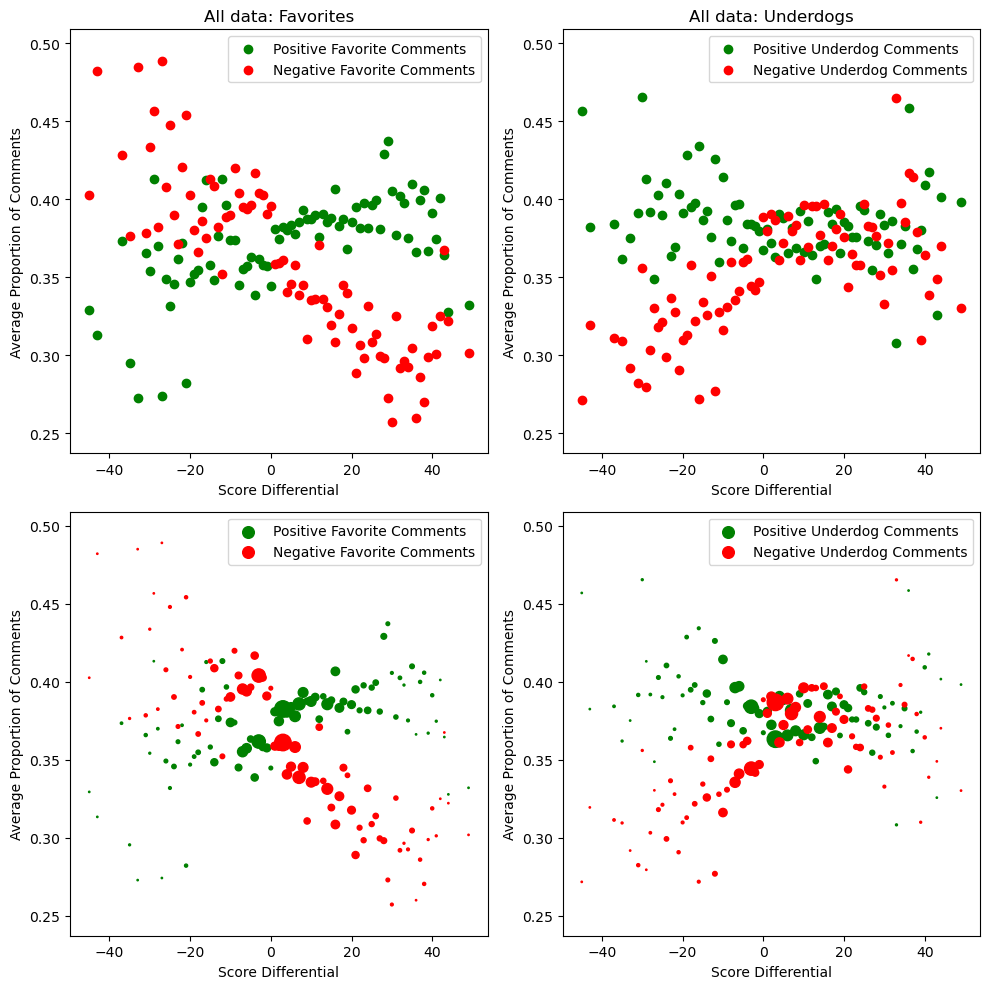

In [122]:
make_graph(df
           , title='All data', filter_col = 'Score Differential')

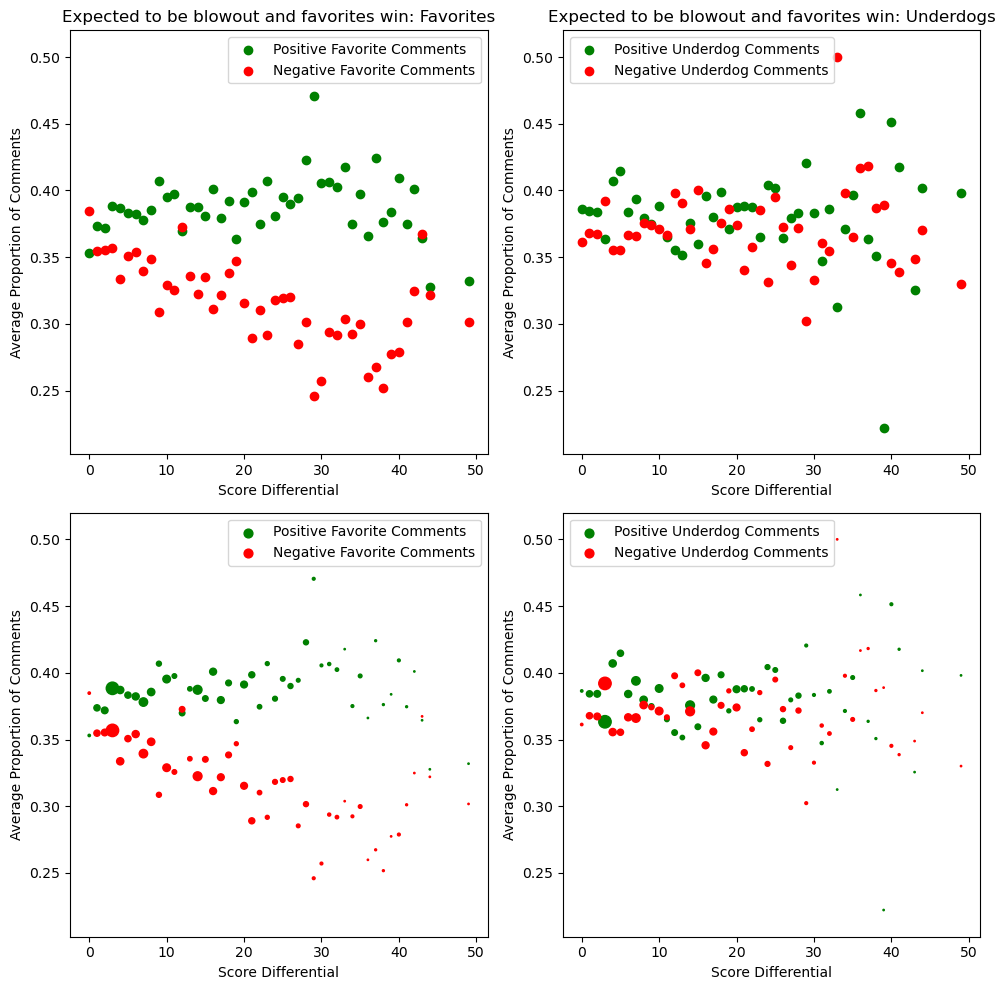

In [123]:
make_graph(df[(df['spread_clean'] >= 4) & (df['Score Differential'] >= 0)]
           , title='Expected to be blowout and favorites win', filter_col = 'Score Differential')

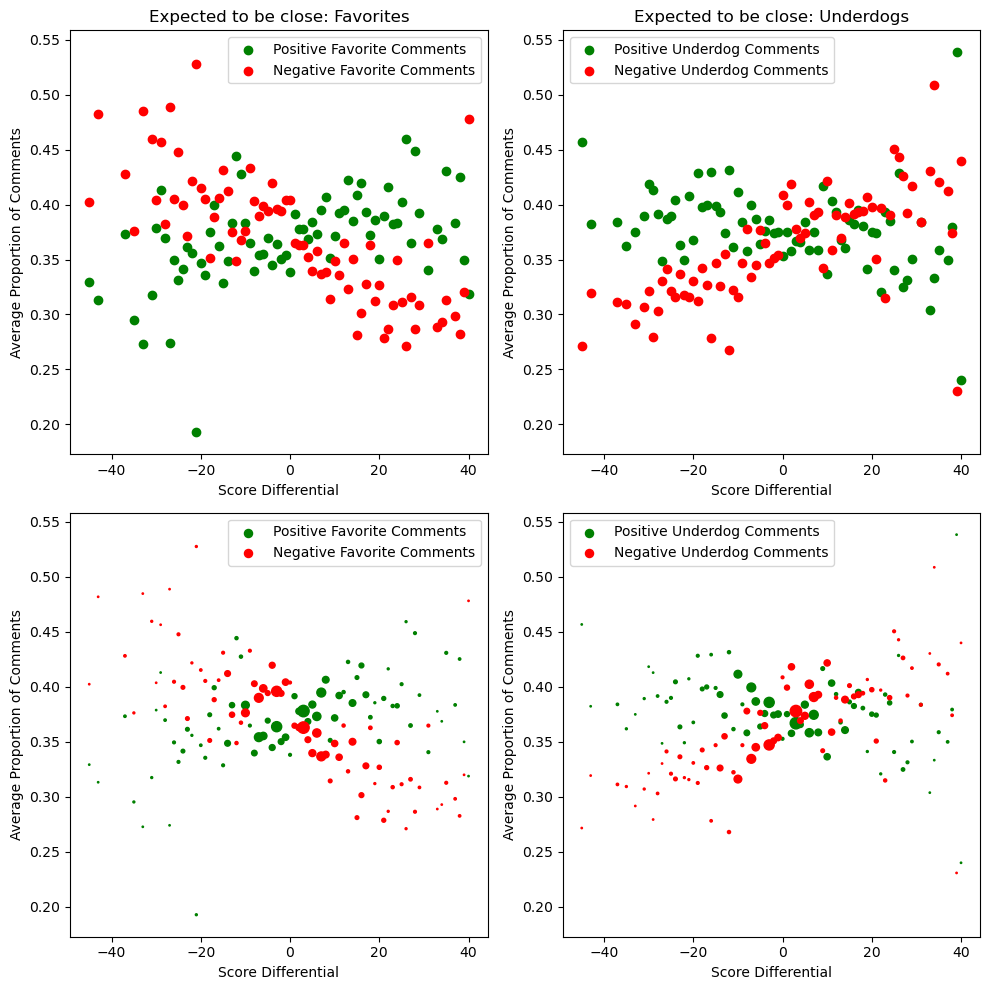

In [124]:
make_graph(df[(df['spread_clean'] <= 4) & (df['spread_clean'] >= -4)]
           , title='Expected to be close', filter_col = 'Score Differential')

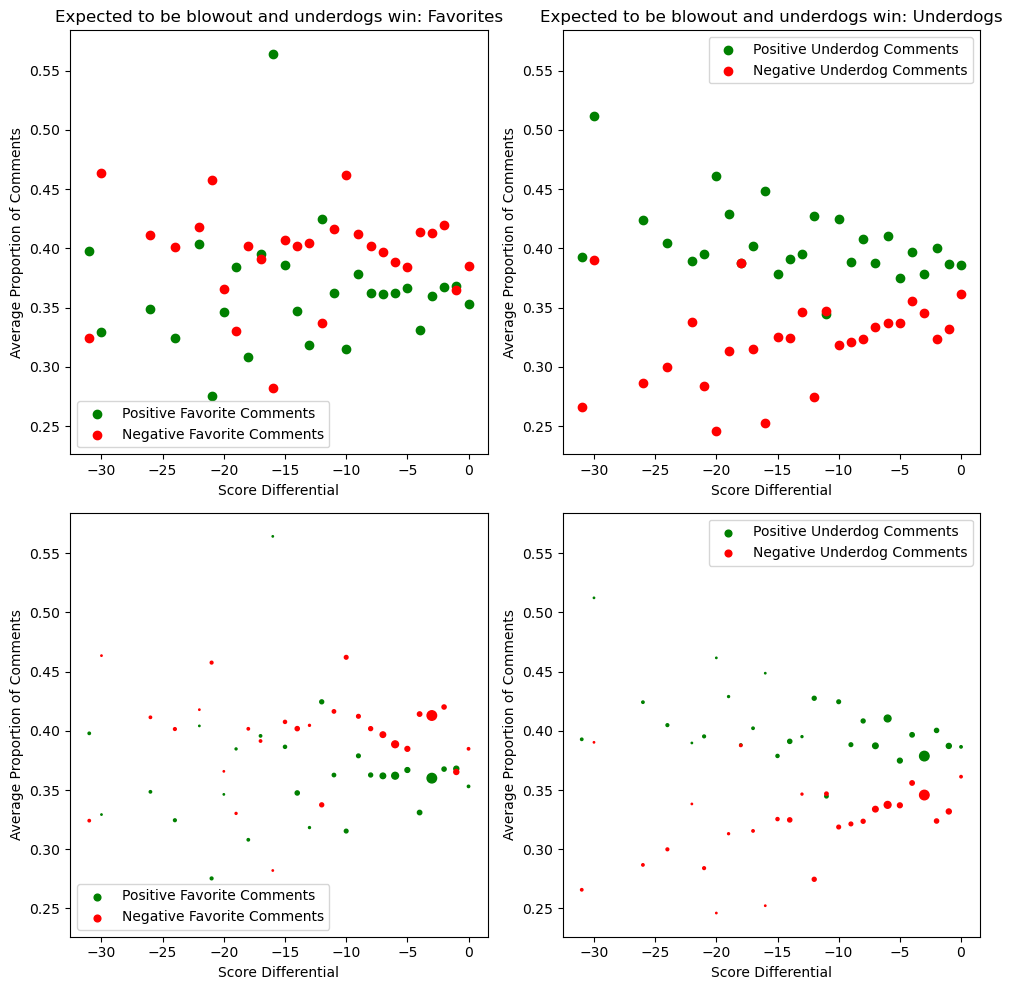

In [125]:
make_graph(df[(df['spread_clean'] >= 4) & (df['Score Differential'] <= 0)]
           , title='Expected to be blowout and underdogs win', filter_col = 'Score Differential')